# Intro to Philosophy 101 - Comparing the different schools of philosophical thought 

### Kejun Liu kl3434

Philosophy is defined to be the "systematic study of general questions". It usually consists of broad and abstract topics where there can be many different perspectives and approaches. A group of people who share common characteristics of opinion form a specific school of thought. There are, in fact, many different schools of philosophical thought that focus on different ideas and topics.

For me, philosophy is a mysterious and intriguing field that I have never explored before. As a beginner, I have no idea how to get started, especially when there are so many different sub-categories of philosophical thinking. I begin to wonder, which one would be the most interesting for me to study. Imagine walking into a bookstore and hoping to pick a philosophy book to read, which kind of philosophical text should I choose? 

In this data notebook, I aim at gaining a deeper insight on the different schools of philosophical thought to help with my "decision-making" by analyzing the different charateristics and topics. 

## 1. Importing Data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/veraliu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
data = pd.read_csv("../data/philosophy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


## 2. Explorary Data Analysis

My first step is to do some explorary analysis on the dataset in order to gain some interesting insights.

In [93]:
# preview the data
data.head(10)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
5,Plato - Complete Works,Plato,plato,But someone else has indicted you?,But someone else has indicted you?,-350,1997,34,but someone else has indicted you?,"['but', 'someone', 'else', 'has', 'indicted', ...",but someone else have indict -PRON- ?
6,Plato - Complete Works,Plato,plato,"I do not really know him myself, Euthyphro.","I do not really know him myself, Euthyphro.",-350,1997,43,"i do not really know him myself, euthyphro.","['do', 'not', 'really', 'know', 'him', 'myself...","-PRON- do not really know -PRON- -PRON- , Eut..."
7,Plato - Complete Works,Plato,plato,He is apparently young and unknown.,He is apparently young and unknown.,-350,1997,35,he is apparently young and unknown.,"['he', 'is', 'apparently', 'young', 'and', 'un...",-PRON- be apparently young and unknown .
8,Plato - Complete Works,Plato,plato,"They call him Meletus, I believe.","They call him Meletus, I believe.",-350,1997,33,"they call him meletus, i believe.","['they', 'call', 'him', 'meletus', 'believe']","-PRON- call -PRON- Meletus , -PRON- believe ."
9,Plato - Complete Works,Plato,plato,"He belongs to the Pitthean deme, if you know a...","He belongs to the Pitthean deme, if you know a...",-350,1997,147,"he belongs to the pitthean deme, if you know a...","['he', 'belongs', 'to', 'the', 'pitthean', 'de...","-PRON- belong to the Pitthean deme , if -PRON..."


It's important to do some data cleaning when we start working on a raw dataset. 

In [5]:
# check if there is any missing values
data.isna().sum()

title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64

In [34]:
# check if there is any duplicate values
data.duplicated().sum()

0

Fortunately, there is no missing values and duplicate values that we need to take care of at this point. So I move on to the next step. 

### 2.1 Visualizing the categorical features

Let's firstly do some simple visualizations on the categorical variables to see if there is anything interesting. 

In [16]:
cat_features = ['title','author','school']

print('There are', data.title.nunique(),'unique titles.')
print('There are', data.author.nunique(), 'unique authors.')
print('There are', data.school.nunique(),'unique schools.')

There are 59 unique titles.
There are 36 unique authors.
There are 13 unique schools.


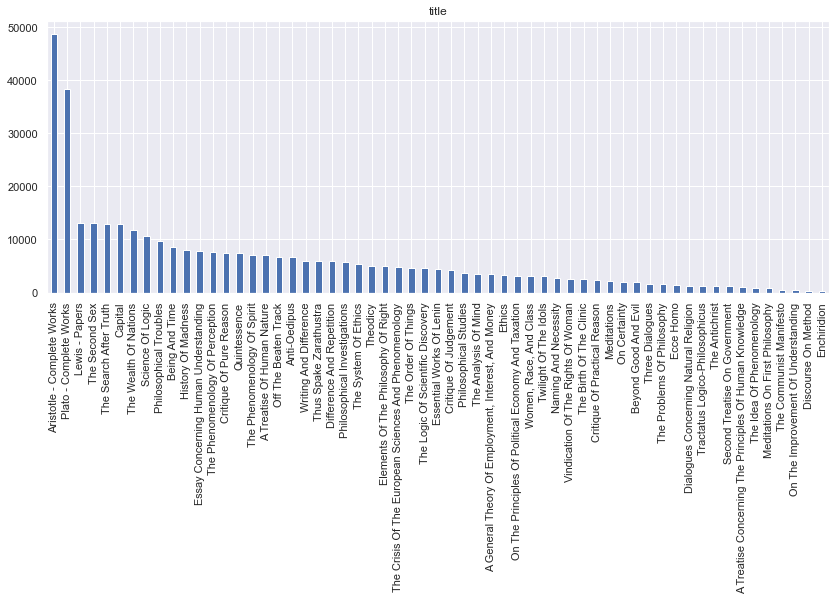

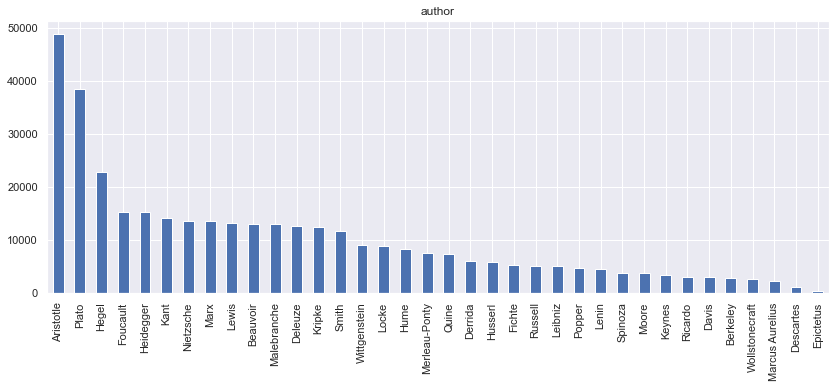

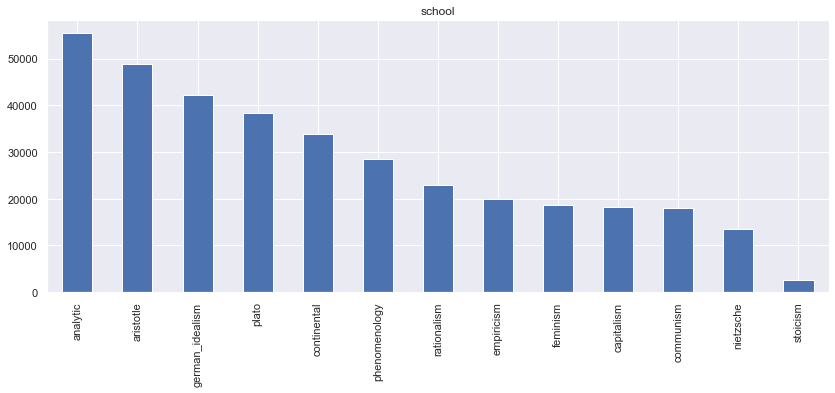

In [40]:
# plot each distribution using bar charts
for i in cat_features:
    plt.figure(figsize=(14,5))
    data[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

### 2.2 Visualizing the numerical features

Similarily, let's take a look at the numerical variables. 

In [32]:
num_features = ['original_publication_date','corpus_edition_date','sentence_length']

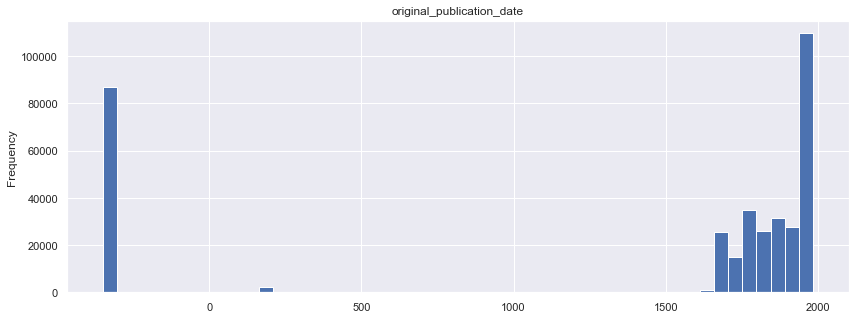

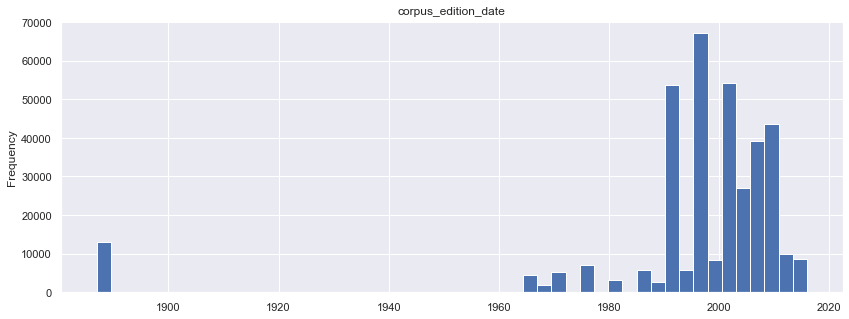

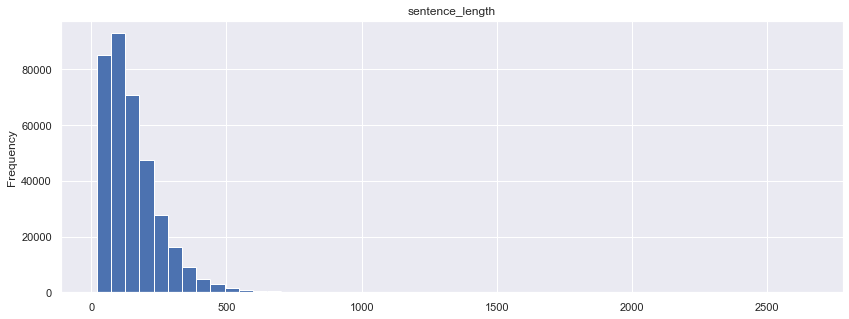

In [39]:
# plot each distribution 
for i in num_features:
    plt.figure(figsize=(14,5))
    data[i].plot(kind='hist', bins=50)
    plt.title(i)
    plt.show()

### 2.3. Dive deep into different schools of thought

From the previous parts, it's interesting to see there are 13 different schools of thought in the field of philosophy. Some of them, such as feminism and communism, are more familiar to us, while the others, such as nietsche, are less well-known. After doing the basic visualizations on the different features, I am excited to dive deeper into exploring more on the different categories of philosophical thinking. How do they differ from each other? How are they related to each other? And what are some characteristics of each group? 

To answer those questions, let's start by getting a quick preview of some basic information for each group, including authors, original publication date, and sentence length. 

In [41]:
data.groupby(by=['school','author']).mean().round(2)

original_publication_date  \
school          author                                       
analytic        Kripke                             1974.36   
                Lewis                              1985.00   
                Moore                              1910.00   
                Popper                             1959.00   
                Quine                              1950.00   
                Russell                            1918.23   
                Wittgenstein                       1948.05   
aristotle       Aristotle                          -320.00   
capitalism      Keynes                             1936.00   
                Ricardo                            1817.00   
                Smith                              1776.00   
communism       Lenin                              1862.00   
                Marx                               1881.72   
continental     Deleuze                            1970.13   
                Derrida                            1967.00   
                Foucault                           1962.87   
empiricism      Berkeley                           1711.86   
                Hume                               1745.09   
                Locke                              1689.00   
feminism        Beauvoir                           1949.00   
                Davis                              1981.00   
                Wollstonecraft                     1792.00   
german_idealism Fichte                             1798.00   
                Hegel                              1814.52   
                Kant                               1784.89   
nietzsche       Nietzsche                          1887.28   
phenomenology   Heidegger                          1937.16   
                Husserl                            1931.40   
                Merleau-Ponty                      1945.00   
plato           Plato                              -350.00   
rationalism     Descartes                          1639.80   
                Leibniz                            1710.00   
                Malebranche                        1674.00   
                Spinoza                            1677.00   
stoicism        Epictetus                           125.00   
                Marcus Aurelius                     170.00   

                                 corpus_edition_date  sentence_length  
school          author                                                 
analytic        Kripke                       2006.49           119.03  
                Lewis                        2008.00           109.72  
                Moore                        2015.00           167.25  
                Popper                       2002.00           139.55  
                Quine                        2004.00           121.64  
                Russell                      2006.77           146.30  
                Wittgenstein                 1984.28            84.88  
aristotle       Aristotle                    1991.00           153.22  
capitalism      Keynes                       2003.00           196.65  
                Ricardo                      2010.00           186.25  
                Smith                        2009.00           185.28  
communism       Lenin                        1966.00           181.42  
                Marx                         1890.03           143.25  
continental     Deleuze                      1995.60           163.67  
                Derrida                      2001.00           143.43  
                Foucault                     2004.27           189.64  
empiricism      Berkeley                     2009.00           139.65  
                Hume                         2003.91           180.19  
                Locke                        2004.77           200.40  
feminism        Beauvoir                     2009.00           148.79  
                Davis                        1981.00           139.67  
                Woll

After gaining an overview on the different school of philosophical thought, there are three particular aspects that I want to further explore.  

### 2.3.1 Comparing the Sentence Length

When reading texts, we usually find that some might be longer and more difficult to read, while other are more straightforward and therefore easier to understand. The first question I want to explore is, do some school of thought have significantly longer sentence length than the others? 

Text(0.5, 1.0, 'School vs. Sentence Length')

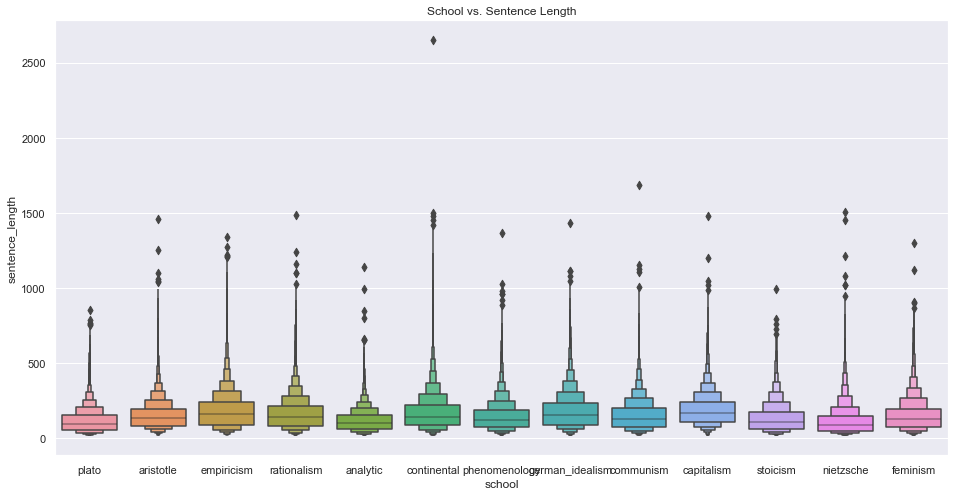

In [88]:
# plot sentence length by school
plt.figure(figsize=(16,8))
sns.boxenplot(x='school', y='sentence_length', data=data)
plt.title('School vs. Sentence Length')

The boxplot above emphasizes more on outliers rather than the average values. For example, we can clearly observe that and there is a continental text with extremely long sentence length. Yet it's not very clear about which school have the shortest text length. So to get a more intuitive insight on the average distribution of sentence length, I try again on the barplot.

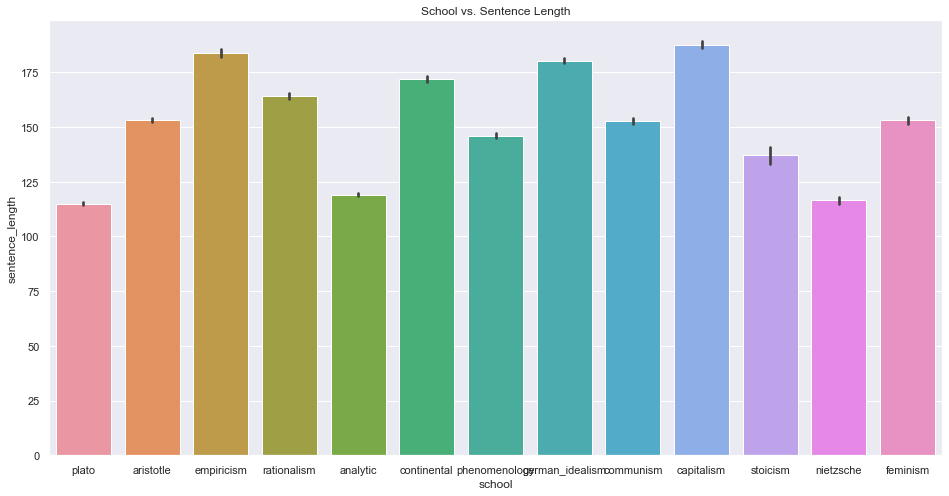

In [87]:
#plot for sentence length in different schools
plt.figure(figsize=(16,8))
sns.barplot(x='school',y='sentence_length',data=data)
plt.title('School vs. Sentence Length')
plt.show()

As shown above, we can easily get an intuition that plato, analytic, and nietsche texts have relatively short sentence length, while empiricism and capitalism have longer text length. 

### 2.3.2 Comparing the Duration 

Secondly, let's take a look at the duration of each school thought. By duration, I use the difference between the latest publication date and the earliest publication date. Works of a particular school of thought are published in this particular period, so it's considered an "active" time range for this school. 

<AxesSubplot:title={'center':'duration'}, ylabel='school of thought'>

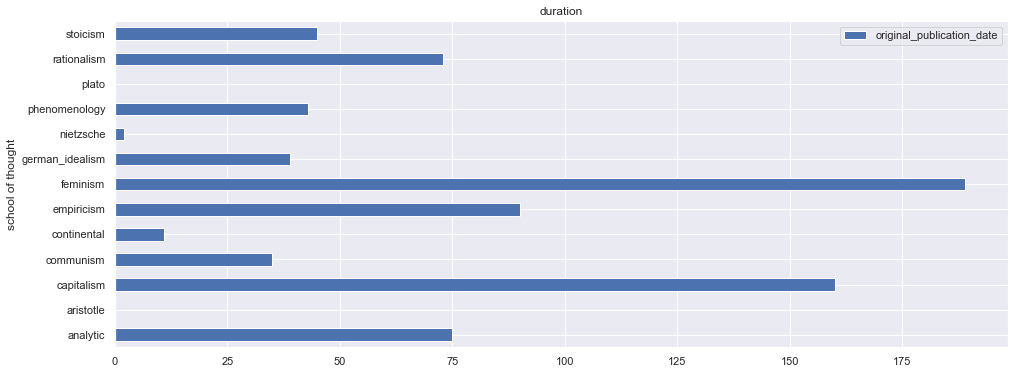

In [91]:
# plot the duration bar chart for each school thought
min_date = data.groupby(['school'])[['original_publication_date']].min()
max_date = data.groupby(['school'])[['original_publication_date']].max()
diff = abs(max_date-min_date)
diff.plot(kind='barh', title='duration', ylabel='original publication date',
         xlabel='school of thought', figsize=(16, 6))

It's interesting to see that feminism and capitalism have longer time range for the publication date of all its works compared to the other schools.Intuitively, feminism and capitalism are among the most popular and general ones that almost everyone has at least hear about them in every day life. It therefore make senses that there are more related works/texts and thus longer "active" time range. On the other hand, the school "nietzsche" seems a less popular one and thus a much shorter time range. 

### 2.3.3 Comparing the Topics

Given the 13 different schools of thought, what exactly are they? What is stoicism? What does nietzsche mainly discuss? These questions are especially intriguing for me, as I have almost zero background knowledge in the field of philosophy. Therefore, I am curious to dive deep into exploring what topics each school of thought discusses, and how they are different from, or related to each other. 

I decide generate wordclouds for each school of thought to gain some interesting insight. By using the graphical representations of word frequency, we can hopefully tell what topics appear most frequently in the text for each school. 

(-0.5, 1199.5, 599.5, -0.5)

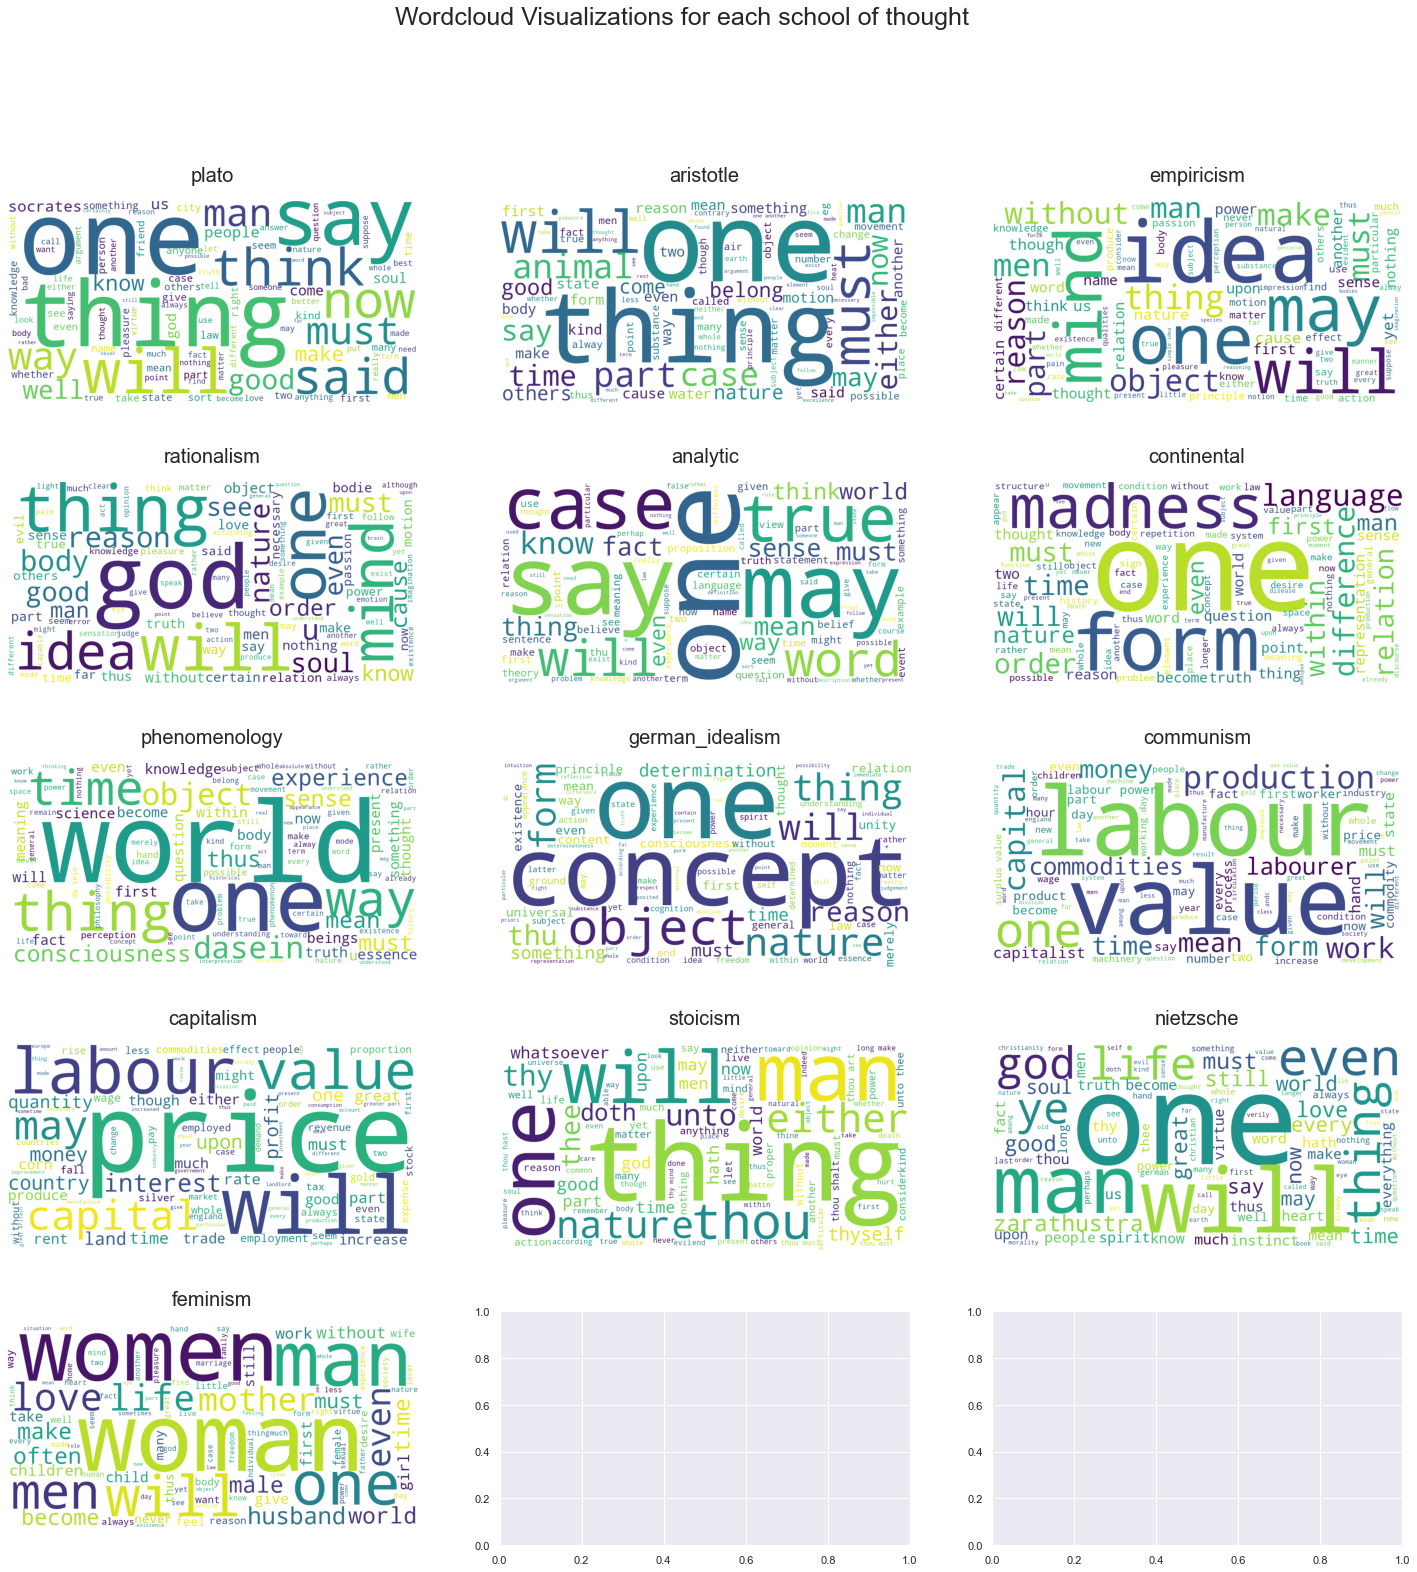

In [60]:
# initialization
stopwords = set(STOPWORDS)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(25, 25))
fig.suptitle('Wordcloud Visualizations for each school of thought', size=25)

# wordcloud for plato
text1 = data[data.school=='plato'].sentence_lowered
text1 = ' '.join(text1).lower()
wc1 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text1)
ax1.imshow(wc1)
ax1.set_title('plato', size=20, pad=20)
ax1.axis('off')

# wordcloud for aristotle
text2 = data[data.school=='aristotle'].sentence_lowered
text2 = ' '.join(text2).lower()
wc2 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text2)
ax2.imshow(wc2)
ax2.set_title('aristotle', size=20, pad=20)
ax2.axis('off')

# wordcloud for empiricism
text3 = data[data.school=='empiricism'].sentence_lowered
text3 = ' '.join(text3).lower()
wc3 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text3)
ax3.imshow(wc3)
ax3.set_title('empiricism', size=20, pad=20)
ax3.axis('off')

# wordcloud for rationalism
text4 = data[data.school=='rationalism'].sentence_lowered
text4 = ' '.join(text4).lower()
wc4 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text4)
ax4.imshow(wc4)
ax4.set_title('rationalism', size=20, pad=20)
ax4.axis('off')

# wordcloud for analytic
text5 = data[data.school=='analytic'].sentence_lowered
text5 = ' '.join(text5).lower()
wc5 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text5)
ax5.imshow(wc5)
ax5.set_title('analytic', size=20, pad=20)
ax5.axis('off')

# wordcloud for continental
text6 = data[data.school=='continental'].sentence_lowered
text6 = ' '.join(text6).lower()
wc6 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text6)
ax6.imshow(wc6)
ax6.set_title('continental', size=20, pad=20)
ax6.axis('off')

# wordcloud for phenomenology
text7 = data[data.school=='phenomenology'].sentence_lowered
text7 = ' '.join(text7).lower()
wc7 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text7)
ax7.imshow(wc7)
ax7.set_title('phenomenology', size=20, pad=20)
ax7.axis('off')

# wordcloud for german_idealism
text8 = data[data.school=='german_idealism'].sentence_lowered
text8 = ' '.join(text8).lower()
wc8 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text8)
ax8.imshow(wc8)
ax8.set_title('german_idealism', size=20, pad=20)
ax8.axis('off')

# wordcloud for communism
text9 = data[data.school=='communism'].sentence_lowered
text9 = ' '.join(text9).lower()
wc9 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text9)
ax9.imshow(wc9)
ax9.set_title('communism', size=20, pad=20)
ax9.axis('off')

# wordcloud for capitalism
text10 = data[data.school=='capitalism'].sentence_lowered
text10 = ' '.join(text10).lower()
wc10 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text10)
ax10.imshow(wc10)
ax10.set_title('capitalism', size=20, pad=20)
ax10.axis('off')

# wordcloud for stoicism
text11 = data[data.school=='stoicism'].sentence_lowered
text11 = ' '.join(text11).lower()
wc11 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text11)
ax11.imshow(wc11)
ax11.set_title('stoicism', size=20, pad=20)
ax11.axis('off')

# wordcloud for nietzsche
text12 = data[data.school=='nietzsche'].sentence_lowered
text12 = ' '.join(text12).lower()
wc12 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text12)
ax12.imshow(wc12)
ax12.set_title('nietzsche', size=20, pad=20)
ax12.axis('off')

# wordcloud for feminism
text13 = data[data.school=='feminism'].sentence_lowered
text13 = ' '.join(text13).lower()
wc13 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text13)
ax13.imshow(wc13)
ax13.set_title('feminism', size=20, pad=20)
ax13.axis('off')

However, some of the above wordclouds don't tell us much about what topics this school of thought discusses. For Plato, for example, we see that "one", "thing" and "say" are among the most popular words. But what do these three words tell us about what topics plato mainly focuses on? Nothing! In fact, we don't really care about verbs such as "say" and "must". What we want are just nouns such as "time" and "people", which will give us more information about what this particular school of thought discusses. 

In addition, I notice that in some of the wordclouds, "thing" is very popular word. Although it's a noun, it's a very general one and thus not very informative about what exactly is discussed. Therefore, I decide to add the word "thing" (as well as its plural form "things") to the list of stopwords that will be removed from the final result.  

In [68]:
# A helper function to return only nouns from data
school = data.school.unique().tolist()
def get_noun(data,school):
    data_sc = data[data.school==school]
    #condition to check whether the word is a noun
    is_noun = lambda pos: pos[:2] == 'NN'
    text = " ".join(sent for sent in data_sc.sentence_lowered)
    tokenized = nltk.word_tokenize(text)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]  
    return nouns

In [69]:
# generate a list of nouns
nlist = pd.Series([get_noun(data,s) for s in school], index=school)
nlist

plato              [socrates, haunts, lyceum, time, king, archon,...
aristotle          [things, name, definition, name, example, man,...
empiricism         [reader, thou, hast, beginning, end, discourse...
rationalism        [essence, existence, nature, existent, thing, ...
analytic           [book, attempt, tendencies, psychology, physic...
continental        [body, defines, right, space, origin, distribu...
phenomenology      [phenomenology, question, century, works, huss...
german_idealism    [critique, critique, reason, reason, paralleli...
communism          [wealth, societies, capitalist, mode, producti...
capitalism         [labour, nation, fund, necessaries, convenienc...
stoicism           [things, power, things, power, power, opinion,...
nietzsche          [book, men, zarathustra, ears, day, tomorrow, ...
feminism           [pleasure, pamphlet, education, volume, dedica...
Name: Example_Series, dtype: object

After we get a list of nouns from the data, we apply it to the wordcloud functions and repeat the previous step. 

In [ ]:
# add "thing" and "things" to the list of stop words
stopwords = list(STOPWORDS)+['thing','things']

(-0.5, 1199.5, 599.5, -0.5)

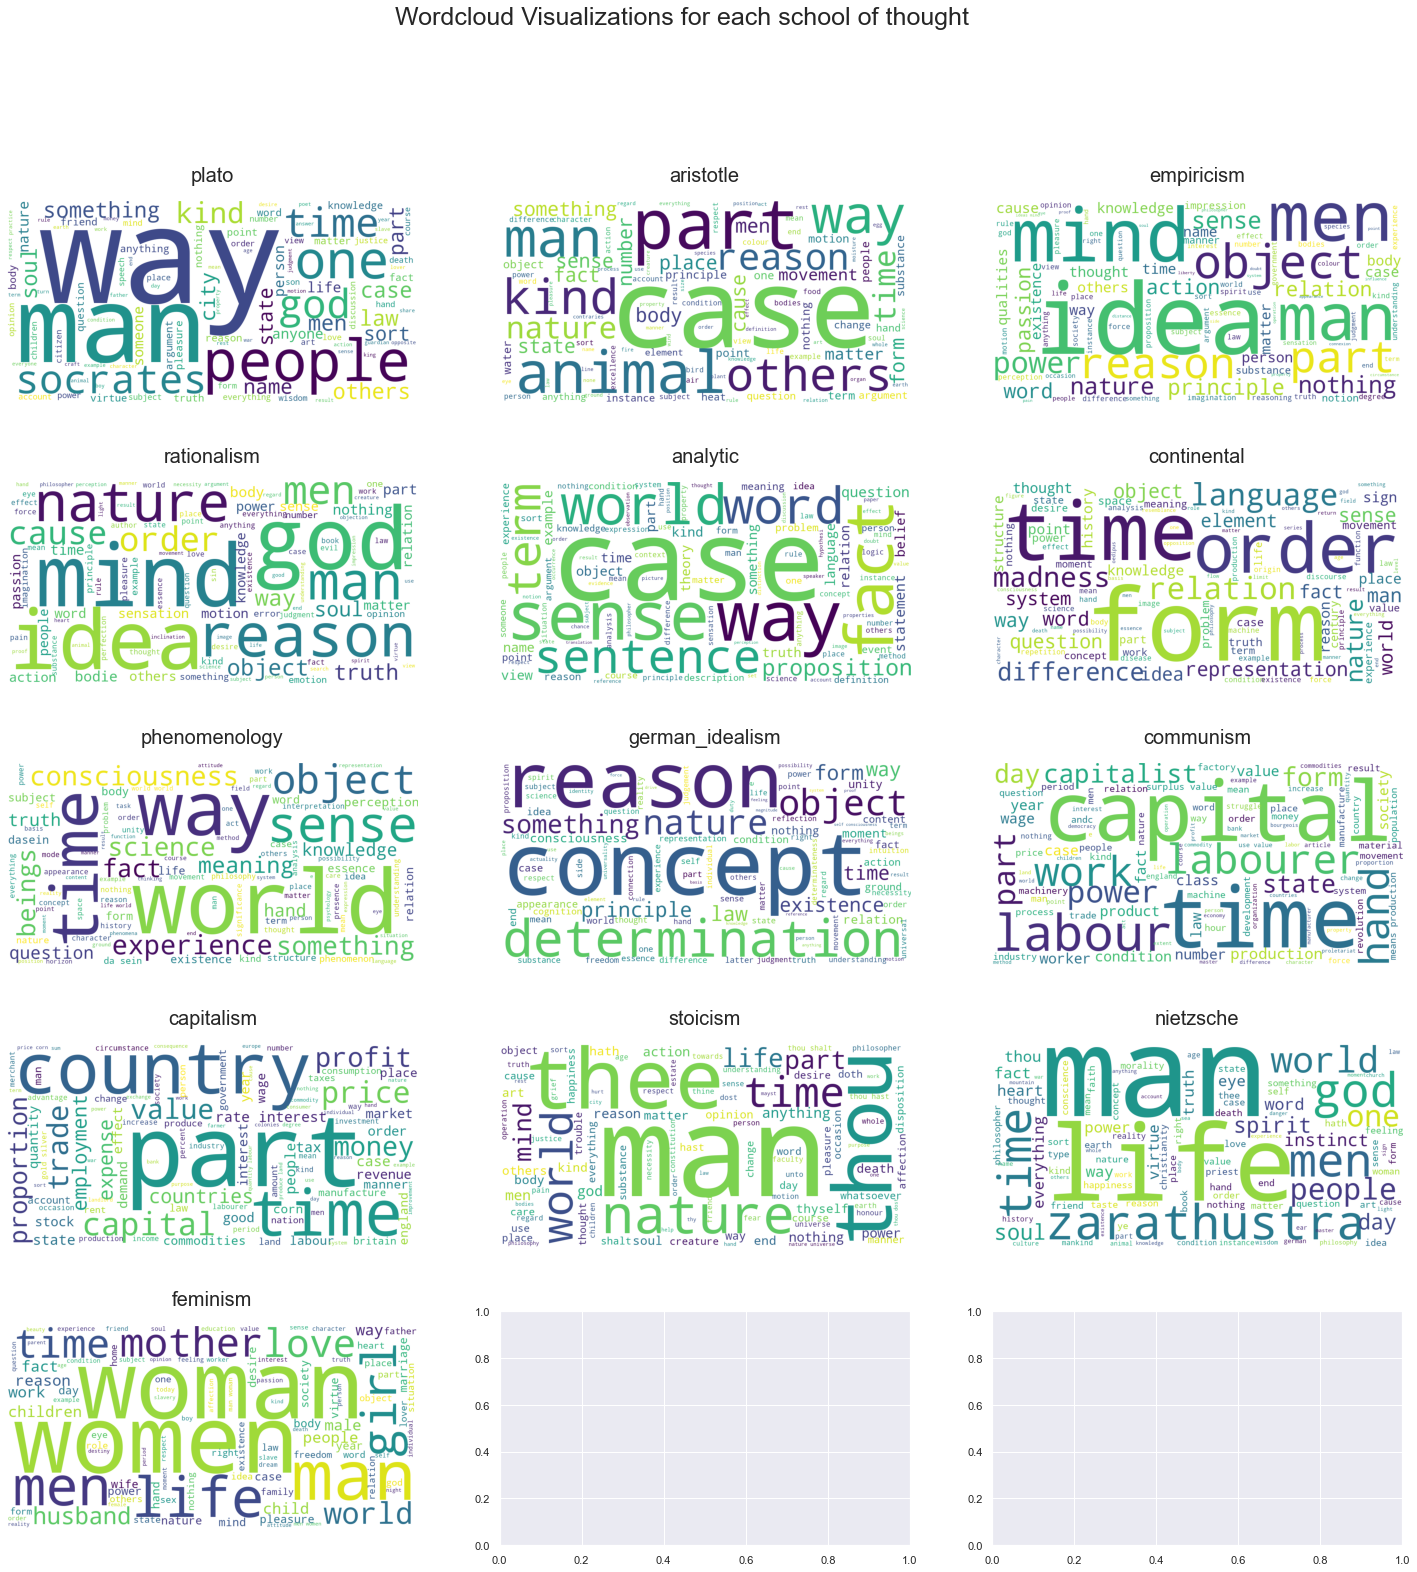

In [84]:
# wordclouds generation, similiar to the previous step
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(25, 25))
fig.suptitle('2nd Version Wordcloud visualizations for each school of thought', size=25)

# wordcloud for plato
text1 = nlist['plato']
text1 = ' '.join(text1).lower()
wc1 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text1)
ax1.imshow(wc1)
ax1.set_title('plato', size=20, pad=20)
ax1.axis('off')

# wordcloud for aristotle
text2 = nlist['aristotle']
text2 = ' '.join(text2).lower()
wc2 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text2)
ax2.imshow(wc2)
ax2.set_title('aristotle', size=20, pad=20)
ax2.axis('off')

# wordcloud for empiricism
text3 = nlist['empiricism']
text3 = ' '.join(text3).lower()
wc3 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text3)
ax3.imshow(wc3)
ax3.set_title('empiricism', size=20, pad=20)
ax3.axis('off')

# wordcloud for rationalism
text4 = nlist['rationalism']
text4 = ' '.join(text4).lower()
wc4 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text4)
ax4.imshow(wc4)
ax4.set_title('rationalism', size=20, pad=20)
ax4.axis('off')

# wordcloud for analytic
text5 = nlist['analytic']
text5 = ' '.join(text5).lower()
wc5 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text5)
ax5.imshow(wc5)
ax5.set_title('analytic', size=20, pad=20)
ax5.axis('off')

# wordcloud for continental
text6 = nlist['continental']
text6 = ' '.join(text6).lower()
wc6 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text6)
ax6.imshow(wc6)
ax6.set_title('continental', size=20, pad=20)
ax6.axis('off')

# wordcloud for phenomenology
text7 = nlist['phenomenology']
text7 = ' '.join(text7).lower()
wc7 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text7)
ax7.imshow(wc7)
ax7.set_title('phenomenology', size=20, pad=20)
ax7.axis('off')

# wordcloud for german_idealism
text8 = nlist['german_idealism']
text8 = ' '.join(text8).lower()
wc8 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text8)
ax8.imshow(wc8)
ax8.set_title('german_idealism', size=20, pad=20)
ax8.axis('off')

# wordcloud for communism
text9 = nlist['communism']
text9 = ' '.join(text9).lower()
wc9 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text9)
ax9.imshow(wc9)
ax9.set_title('communism', size=20, pad=20)
ax9.axis('off')

# wordcloud for capitalism
text10 = nlist['capitalism']
text10 = ' '.join(text10).lower()
wc10 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text10)
ax10.imshow(wc10)
ax10.set_title('capitalism', size=20, pad=20)
ax10.axis('off')

# wordcloud for stoicism
text11 = nlist['stoicism']
text11 = ' '.join(text11).lower()
wc11 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text11)
ax11.imshow(wc11)
ax11.set_title('stoicism', size=20, pad=20)
ax11.axis('off')

# wordcloud for nietzsche
text12 = nlist['nietzsche']
text12 = ' '.join(text12).lower()
wc12 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text12)
ax12.imshow(wc12)
ax12.set_title('nietzsche', size=20, pad=20)
ax12.axis('off')

# wordcloud for feminism
text13 = nlist['feminism']
text13 = ' '.join(text13).lower()
wc13 = WordCloud(stopwords=stopwords, max_words=100,scale=3,background_color="white").generate(text13)
ax13.imshow(wc13)
ax13.set_title('feminism', size=20, pad=20)
ax13.axis('off')

# 3. Discussion

The wordcloud visualizations give us hints on what topics a particular school of thought mostly discusses. Let's take  an example. 

#### Eg. Capitalism

In [95]:
# print out capitalism key words
capitalism_key_words = [" country ",' time ',' profit ',' capital ',' part ',' trade ', ' value ', ' money ']
print(f"Capitalism key words: ")
for i,word in enumerate(capitalism_key_words):
    print(f"{i+1}: {word}")

Capitalism key words: 
1:  country 
2:  time 
3:  profit 
4:  capital 
5:  part 
6:  trade 
7:  value 
8:  money 


By definition, capitalism is thought of as an economic system based on the private ownership of the means of production and their operation for profit. The essential feature of capitalism is the motive to make a profit. The generated key words, , such as "capital" and "profit", align with the main idea. 

#### Eg. Communism

In [97]:
# print out communism key words
communism_key_words = [" capital ",' labour',' time ',' work ',' power ',' work ', ' state ', ' class ']
print(f"Communism key words: ")
for i,word in enumerate(communism_key_words):
    print(f"{i+1}: {word}")

Communism key words: 
1:  capital 
2:  labour
3:  time 
4:  work 
5:  power 
6:  work 
7:  state 
8:  class 


Similarily, by definition, communism is thought as an ideology that bases itself on the belief that the means of production in a society should belong to the state. The top key words generated by the wordcloud also aligned with the main idea. 